In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy
from scipy import stats as stats
from copy import copy as copy

from openpyxl import load_workbook
from openpyxl.worksheet.table import Table
# import seaborn as sns


In [2]:
writeOutput = False

In [3]:
os.getcwd()

'/Users/upton6/Library/CloudStorage/OneDrive-QueenslandUniversityofTechnology/Documents/notebooks/Nanostring/Adams_Bray/DSP_EDA_Protein'

In [4]:
# read in paths from config file
configDict = {
    'rootDir': '',
    'initialDataPath' : '',
    'QCDataPath' : '',
    'labWorksheet01Path':'',
    'sampleInfoFile' : '',
    'projectName':'',
}

with open('./config.txt','r') as f:
    lines = f.readlines()
    for line in lines:
        if not line.startswith('#'):
            line = line.strip()
            fields = line.split(':')

            if fields[0].strip()=='initialDataPath':
                configDict[fields[0].strip()] = fields[1].strip().strip('\'')
            else:
                configDict[fields[0].strip()] = fields[1].strip().strip('\'')
## ToDo: Add checks to ensure that minimal fields have been populated. Raise errors or warnings

In [5]:
configDict

{'rootDir': '/Users/upton6/Documents/Nanostring/projects/Adams/',
 'initialDataPath': 'Initial Dataset.xlsx',
 'QCDataPath': 'Default_QC.xlsx',
 'labWorksheet01Path': 'Lab_Worksheet_P1001660017100A.txt',
 'sampleInfoFile': 'sampleInfo_with_Wells.csv',
 'projectName': 'Adams_Bray'}

# Define functions

In [6]:
# Functinos have been moved out to .py files.

# Run Analysis

In [7]:
# ToDo:
# add sample info file details into config file in previous notebook
# sampleInfo_with_Wells.csv

In [8]:
# ToDo: Should initial filtering be done using none-mean-HKGeoMean normalised data. Using a type of background subtraction for filtering would bias towards removing noisy or low expressing samples. Removing these may give more accurate estimates of real probe values.

# Read-in nanostring normalised data

In [9]:


normDir = os.path.join(configDict['rootDir'], 'Normalisation')

normDir

QCDataFile = [f for f in os.listdir(normDir) if (f.startswith('QC') and f.endswith('RUV.csv'))][0]

QCDataFile

# tempDF



'QC_Adams_Bray_RUV.csv'

### Sort samples and probes 

In [10]:

# tempDF1 = pd.read_csv(os.path.join(normDir, 'NSNorm',files[0]), index_col=0)
# v = tempDF1.mean(axis=1).sort_values().index

# sampleOrder = sorted(tempDF1.columns)

QCDataDF = pd.read_csv(os.path.join(normDir, QCDataFile), index_col=0)
QCDataDF.columns = [x.replace(' ','.') for x in QCDataDF.columns]
QCDataDF.columns = [x.replace('-','.') for x in QCDataDF.columns]


codeClass = QCDataDF.loc[:,'Code.Class']

probeOrder = QCDataDF.index[8:]
sampleOrder = QCDataDF.columns[1:]

# sampleOrder

# Read-in sampleInfo

In [11]:
sampleInfo = pd.read_csv(os.path.join(configDict['rootDir'], configDict['sampleInfoFile']), index_col=0)

In [12]:
sampleInfo

TMA_001_TNBC_240327a_001_Segment 1  \
Custom Segment Name                                 TMA_001_TNBC_240327a | 001 | Segment 1   
ROI                                                   1c2ab061-972b-4227-95e9-5258d51c8e27   
ROI (Label)                                                                            001   
Segment                                               7936d809-ce05-4697-b1fd-f78adfeed555   
Segment (Name/ Label)                                                            Segment 1   
ROI X Coordinate                                                          15998.4228515625   
ROI Y Coordinate                                                                 47604.875   
Segment Tags                                                                     Segment 1   
AOI                                                                                      1   
AOI surface area                                                                      8341   
AOI nuclei count                                                                       111   
Fov count                                                                              555   
Fov counted                                                                            543   
BindingDensity                                                                         0.2   
Scan Name                                                             TMA_001_TNBC_240327a   
Slide                                                 28915c3d-c3ae-4cad-a109-774962c18b57   
Scan plexset                                                                             2   
Origin Instrument ID                                                             2001G0086   
#Factor                                                                                NaN   
Sample_Type                                                                        primary   
Patient                                                                      2011A19876_1O   
Scan_ID                                                               TMA_001_TNBC_240327a   
Broad_classification                                                               Primary   
ROI_ID                                                                                 001   
LOT_Human_Immune_Cell_Profiling_Protein_Core_1_1                                 ICPH10007   
LOT_Human_Immune_Activation_Status_Protein_Modu...                               IASH10003   
LOT_Human_Immune_Cell_Typing_Protein_Module_1_0                                   ICTH1006   
LOT_Human_Pan_Tumor_Protein_Module_1_0                                           PTRH10001   
LOT_Human_IO_Drug_Target_Protein_Module_1_1                                      DRGH10003   
LOT_Human_PI3K_AKT_Signaling_Protein_Module_1_0                                  PKSH10002   
LOT_Human_nC_Cell_Death_Protein_1_2                                              CLDH10001   
Well                                                                                   A01   
Row                                                                                      A   
Col                                                                                     01   
Plate                                                                                    1   

                                                        TMA_001_TNBC_240327a_002_Segment 1  \
Custom Segment Name                                 TMA_001_TNBC_240327a | 002 | Segment 1   
ROI                                                   b465b231-4735-4036-96b5-51b75b387433   
ROI (Label)                                                                            002   
Segment                                               0a7b8f61-078d-4877-9053-b53e5fd4614d   
Segment (Name/ Label)                                                            Segment 1   
ROI X Coordinate                                                           17548.470703125   
ROI Y Coordin

In [13]:
colTemp = sampleInfo.columns
colTemp = [x.replace(' ','.') for x in colTemp]
colTemp = [x.replace('-','.') for x in colTemp]
sampleInfo.columns = colTemp


sampleInfo = sampleInfo.loc[:,sampleOrder]

In [14]:
sampleInfo

TMA_001_TNBC_240327a_001_Segment.1  \
Custom Segment Name                                 TMA_001_TNBC_240327a | 001 | Segment 1   
ROI                                                   1c2ab061-972b-4227-95e9-5258d51c8e27   
ROI (Label)                                                                            001   
Segment                                               7936d809-ce05-4697-b1fd-f78adfeed555   
Segment (Name/ Label)                                                            Segment 1   
ROI X Coordinate                                                          15998.4228515625   
ROI Y Coordinate                                                                 47604.875   
Segment Tags                                                                     Segment 1   
AOI                                                                                      1   
AOI surface area                                                                      8341   
AOI nuclei count                                                                       111   
Fov count                                                                              555   
Fov counted                                                                            543   
BindingDensity                                                                         0.2   
Scan Name                                                             TMA_001_TNBC_240327a   
Slide                                                 28915c3d-c3ae-4cad-a109-774962c18b57   
Scan plexset                                                                             2   
Origin Instrument ID                                                             2001G0086   
#Factor                                                                                NaN   
Sample_Type                                                                        primary   
Patient                                                                      2011A19876_1O   
Scan_ID                                                               TMA_001_TNBC_240327a   
Broad_classification                                                               Primary   
ROI_ID                                                                                 001   
LOT_Human_Immune_Cell_Profiling_Protein_Core_1_1                                 ICPH10007   
LOT_Human_Immune_Activation_Status_Protein_Modu...                               IASH10003   
LOT_Human_Immune_Cell_Typing_Protein_Module_1_0                                   ICTH1006   
LOT_Human_Pan_Tumor_Protein_Module_1_0                                           PTRH10001   
LOT_Human_IO_Drug_Target_Protein_Module_1_1                                      DRGH10003   
LOT_Human_PI3K_AKT_Signaling_Protein_Module_1_0                                  PKSH10002   
LOT_Human_nC_Cell_Death_Protein_1_2                                              CLDH10001   
Well                                                                                   A01   
Row                                                                                      A   
Col                                                                                     01   
Plate                                                                                    1   

                                                        TMA_001_TNBC_240327a_003_Segment.1  \
Custom Segment Name                                 TMA_001_TNBC_240327a | 003 | Segment 1   
ROI                                                   208ede3e-c633-4f23-aa77-98412fc80c33   
ROI (Label)                                                                            003   
Segment                                               9e6564c7-7f87-44e1-8de7-7f264d9652e7   
Segment (Name/ Label)                                                            Segment 1   
ROI X Coordinate                                                            22190.41015625   
ROI Y Coordin

In [15]:
factors = input('enter factors to be used for groups to check probe expression. separate multiple factors by a comma')

enter factors to be used for groups to check probe expression. separate multiple factors by a comma 


In [16]:
factors = factors.split(',')
factors = [f.strip() for f in factors]

In [17]:

# factors = ['Sample_Type', 'Patient', 'Broad_classification']
factors = ['Broad_classification']
factors

['Broad_classification']

In [18]:
# generate a dictionary to hold factors for group analysis
factorDict = {}
factorDict2 = {}

for f in factors:
    entries = list(set(sampleInfo.loc[f].values))
    print(entries)
    factorDict[f] = entries
    factorDict2[f] = {}
    for e in entries:
        factorDict2[f][e] = sampleInfo.columns[sampleInfo.loc[f] == e]
    

['Primary', 'Secondary']


In [19]:
factorDict.keys()

dict_keys(['Broad_classification'])

In [20]:
factorDict2

{'Broad_classification': {'Primary': Index(['TMA_001_TNBC_240327a_001_Segment.1',
         'TMA_001_TNBC_240327a_003_Segment.1',
         'TMA_001_TNBC_240327a_005_Segment.1',
         'TMA_001_TNBC_240327a_007_Segment.1',
         'TMA_001_TNBC_240327a_009_Segment.1',
         'TMA_001_TNBC_240327a_010_Segment.1',
         'TMA_001_TNBC_240327a_011_Segment.1',
         'TMA_001_TNBC_240327a_015_Segment.1',
         'TMA_001_TNBC_240327a_016_Segment.1',
         'TMA_001_TNBC_240327a_017_Segment.1',
         'TMA_001_TNBC_240327a_020_Segment.1',
         'TMA_001_TNBC_240327a_021_Segment.1',
         'TMA_001_TNBC_240327a_023_Segment.1',
         'TMA_001_TNBC_240327a_024_Segment.1',
         'TMA_001_TNBC_240327a_028_Segment.1',
         'TMA_001_TNBC_240327a_031_Segment.1',
         'TMA_001_TNBC_240327a_034_Segment.1',
         'TMA_001_TNBC_240327a_037_Segment.1',
         'TMA_001_TNBC_240327a_040_Segment.1',
         'TMA_001_TNBC_240327a_041_Segment.1',
         'TMA_001_TNBC_24

# Visualise Nanostring Norm results and choose samples to be kept for final normalisation

In [21]:
configDict

{'rootDir': '/Users/upton6/Documents/Nanostring/projects/Adams/',
 'initialDataPath': 'Initial Dataset.xlsx',
 'QCDataPath': 'Default_QC.xlsx',
 'labWorksheet01Path': 'Lab_Worksheet_P1001660017100A.txt',
 'sampleInfoFile': 'sampleInfo_with_Wells.csv',
 'projectName': 'Adams_Bray'}

In [22]:
QCDataDF

Code.Class  TMA_001_TNBC_240327a_001_Segment.1  \
Name                                                                      
HYB-POS                    Positive                           12.625935   
Ms IgG1                    Negative                            2.720807   
Ms IgG2a                   Negative                            2.627672   
Rb IgG                     Negative                            1.045593   
HYB-NEG                    Negative                            0.000000   
...                             ...                                 ...   
PD-L2                    Endogenous                            1.194733   
Phospho-GSK3B (S9)       Endogenous                            0.000000   
MART1                    Endogenous                            0.239181   
B7-H3                    Endogenous                            0.899915   
Phospho-Tuberin (T1462)  Endogenous                            0.000000   

                         TMA_001_TNBC_240327a_003_Segment.1  \
Name                                                          
HYB-POS                                           12.625935   
Ms IgG1                                            2.331394   
Ms IgG2a                                           2.132914   
Rb IgG                                             1.066650   
HYB-NEG                                            0.000000   
...                                                     ...   
PD-L2                                              1.215790   
Phospho-GSK3B (S9)                                 0.000000   
MART1                                              0.260238   
B7-H3                                              0.327210   
Phospho-Tuberin (T1462)                            0.278574   

                         TMA_001_TNBC_240327a_004_Segment.1  \
Name                                                          
HYB-POS                                           12.625935   
Ms IgG1                                            2.736299   
Ms IgG2a                                           3.146628   
Rb IgG                                             0.557196   
HYB-NEG                                            1.004169   
...                                                     ...   
PD-L2                                              1.334509   
Phospho-GSK3B (S9)                                 0.248340   
MART1                                              0.950250   
B7-H3                                              0.445930   
Phospho-Tuberin (T1462)                            0.397293   

                         TMA_001_TNBC_240327a_005_Segment.1  \
Name                                                          
HYB-POS                                           12.625935   
Ms IgG1                                            2.631488   
Ms IgG2a                                           2.510311   
Rb IgG                                             1.516725   
HYB-NEG                                            0.314395   
...                                                     ...   
PD-L2                                              0.824320   
Phospho-GSK3B (S9)                                 0.000000   
MART1                                              1.253591   
B7-H3                                              1.354296   
Phospho-Tuberin (T1462)                            1.281398   

                         TMA_001_TNBC_240327a_006_Segment.1  \
Name                                                          
HYB-POS                                           12.625935   
Ms IgG1                                            2.860733   
Ms IgG2a                                           2.342814   
Rb IgG                                             1.135462   
HYB-NEG                                            0.000000   
...                                                     ...   
PD-L2                                              0.000000   
Phospho-GSK3B (S9)    

In [23]:
files = os.listdir(os.path.join(normDir, 'NSNorm'))
files = sorted(files)
# # print(len(files))
# # print(files)

# fileIdx = 0
# tempFile = os.path.join(normDir, 'NSNorm',files[fileIdx])

# print(tempFile)
# tempDF = pd.read_csv(os.path.join(normDir, 'NSNorm',files[fileIdx]), index_col=0)


In [24]:
probeOrder

Index(['SMA', 'CTLA4', 'PARP', 'Fibronectin', 'Ki-67', 'HLA-DR', 'CD68',
       'CD45', 'Pan-AKT', 'p53', 'CD45RO', 'CD44', 'PanCk', 'MET', 'CD20',
       'GZMB', 'CD4', 'CD8', 'S100B', 'CD11c', 'CD3', 'BAD', 'Tim-3', 'CD127',
       'STING', 'CD56', 'Phospho-GSK3A (S21)/Phospho-GSK3B (S9)', 'PTEN',
       'Beta-2-microglobulin', 'Neurofibromin', 'Cleaved Caspase 9', 'EpCAM',
       'Phospho-AKT1 (S473)', 'PD-1', 'INPP4B', 'NY-ESO-1', 'BCL6', 'CD14',
       '4-1BB', 'FAP-alpha', 'CD25', 'IDO1', 'ICOS', 'VISTA', 'GZMA',
       'ER-alpha', 'Her2', 'OX40L', 'BIM', 'CD95/Fas', 'Bcl-2', 'PD-L1',
       'Phospho-PRAS40 (T246)', 'BCLXL', 'PLCG1', 'CD40', 'CD34', 'FOXP3',
       'CD66b', 'CD163', 'ARG1', 'PR', 'CD80', 'GITR', 'CD27', 'LAG3', 'PD-L2',
       'Phospho-GSK3B (S9)', 'MART1', 'B7-H3', 'Phospho-Tuberin (T1462)'],
      dtype='object', name='Name')

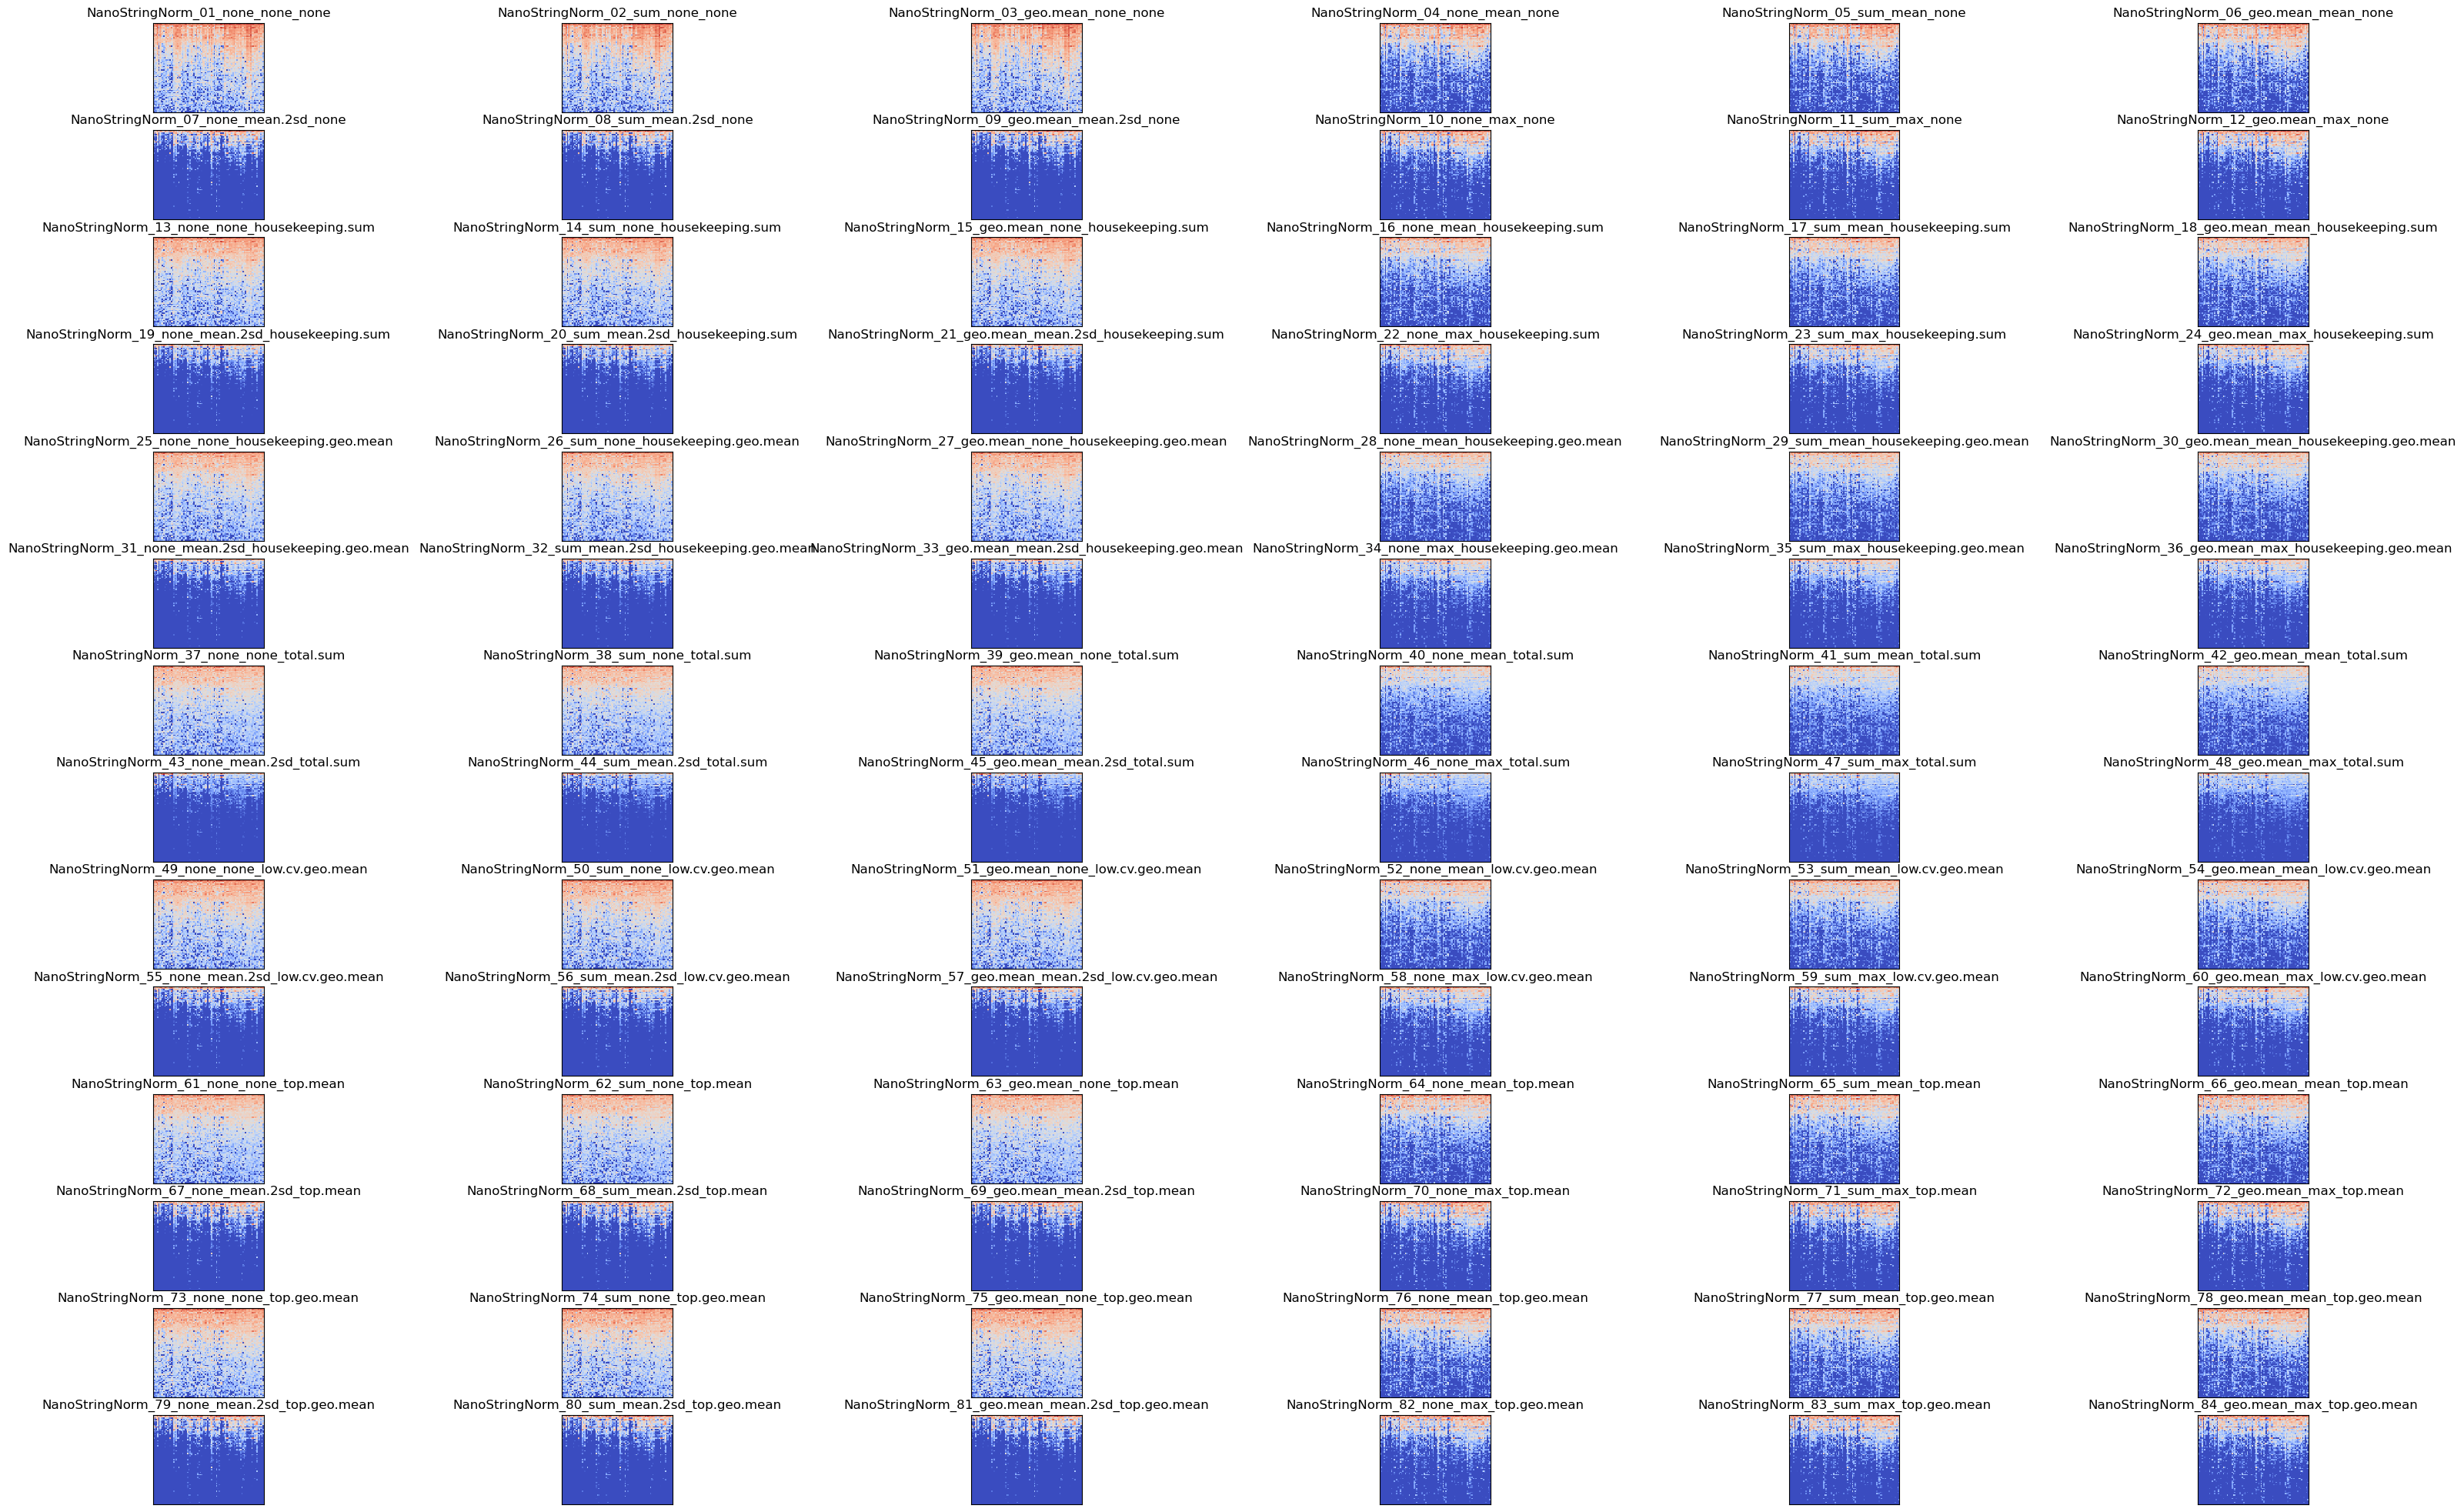

In [25]:
width = 6
height = 14


fig, axs = plt.subplots(height, width, figsize=[40,25])
# fig.suptitle('Nanostring Normalisation heatmaps')

for y in range(height):
    for x in range(width):
        fileIdx = x + y*width
        tempDF = pd.read_csv(os.path.join(normDir, 'NSNorm',files[fileIdx]), index_col=0)
#         axs[y][x].matshow(np.log2(tempDF + 1), aspect = 'auto', cmap='coolwarm')
        axs[y][x].matshow(np.log2(tempDF.loc[probeOrder,sampleOrder] + 1), cmap='coolwarm')
        axs[y][x].set_xticks([])
        axs[y][x].set_yticks([])
        axs[y][x].set_title(files[fileIdx][:-4])
    
# plt.tight_layout()
# fig.show()
fig.savefig('NSNorm.png')


# Threshold data

In [26]:
controlSet = set(['HYB-NEG', 'HYB-POS', 'Rb IgG', 'Ms IgG2a', 'Ms IgG1'])

### Threshold probes and drop low or null expressing probes

In [27]:
# ToDo: Add in a variable called  thresholdData to hold data for comparison at thresholding stage. This will be read from one of the normalised files.

In [28]:
thresholdData = pd.read_csv(os.path.join(normDir, 'NSNorm',files[51]), index_col=0)
thresholdData.columns = [x.replace(' ','.') for x in thresholdData.columns]
thresholdData.columns = [x.replace('-','.') for x in thresholdData.columns]



In [29]:
threshold = 1.5
expPropCutOff = 0.5
SamplePropCutOff = 0.5

dropList = []

dropSetTemp = []

for f in factorDict2.keys():
    print(f)
    for g in factorDict2[f].keys():
        print(g)
        # print(factorDict2[f][g])
        groupLen = len(factorDict2[f][g])
        # print(groupLen)
        passThreshold = (thresholdData[factorDict2[f][g]]>threshold).sum(axis=1)
        # print(passThreshold)
        passThreshProp = (passThreshold/groupLen) < expPropCutOff
        # print(passThreshProp)
        failIdx = thresholdData.index[passThreshProp]
        print(failIdx)
        print(len(failIdx))

        if (len(failIdx) > 0):
            dropList.extend(list(failIdx))
            dropSetTemp.append(list(failIdx))
        # print(thresholdData.index[((thresholdData[factorDict2[f][g]]>2).sum(axis=1)/groupLen) < 0.5])

dropList = list(set(dropList) - controlSet)
print(dropList)
print(dropSetTemp)

# dropSet = set(tuple(x) for x in dropSetTemp)

Broad_classification
Primary
Index(['CD3', 'BAD', 'STING', 'CD56', 'Phospho-GSK3A (S21)/Phospho-GSK3B (S9)',
       'PTEN', 'Beta-2-microglobulin', 'Neurofibromin', 'Cleaved Caspase 9',
       'EpCAM', 'Phospho-AKT1 (S473)', 'PD-1', 'INPP4B', 'NY-ESO-1', 'BCL6',
       'CD14', '4-1BB', 'FAP-alpha', 'CD25', 'IDO1', 'ICOS', 'VISTA', 'GZMA',
       'ER-alpha', 'Her2', 'OX40L', 'BIM', 'CD95/Fas', 'Bcl-2', 'PD-L1',
       'Phospho-PRAS40 (T246)', 'BCLXL', 'PLCG1', 'CD40', 'CD34', 'FOXP3',
       'CD66b', 'CD163', 'ARG1', 'PR', 'CD80', 'GITR', 'CD27', 'LAG3', 'PD-L2',
       'Phospho-GSK3B (S9)', 'MART1', 'B7-H3', 'Phospho-Tuberin (T1462)'],
      dtype='object')
49
Secondary
Index(['S100B', 'Tim-3', 'CD127', 'STING', 'CD56',
       'Phospho-GSK3A (S21)/Phospho-GSK3B (S9)', 'PTEN',
       'Beta-2-microglobulin', 'Neurofibromin', 'Cleaved Caspase 9', 'EpCAM',
       'Phospho-AKT1 (S473)', 'PD-1', 'INPP4B', 'NY-ESO-1', 'BCL6', 'CD14',
       '4-1BB', 'FAP-alpha', 'CD25', 'IDO1', 'ICOS', 'VISTA

In [30]:
dropSet = set(dropSetTemp[0])

for x in range(1,len(dropSetTemp)):
    print(x)
    dropSet = dropSet & set(dropSetTemp[1])

dropSet = dropSet - controlSet
# dropSet
dropList = list(dropSet)
# dropList
QCDataDF = QCDataDF.drop(index=dropList)

1


In [31]:
codeClass = codeClass[QCDataDF.index]

In [32]:
codeClass

Name
HYB-POS          Positive
Ms IgG1          Negative
Ms IgG2a         Negative
Rb IgG           Negative
HYB-NEG          Negative
Histone H3        Control
GAPDH             Control
S6                Control
SMA            Endogenous
CTLA4          Endogenous
PARP           Endogenous
Fibronectin    Endogenous
Ki-67          Endogenous
HLA-DR         Endogenous
CD68           Endogenous
CD45           Endogenous
Pan-AKT        Endogenous
p53            Endogenous
CD45RO         Endogenous
CD44           Endogenous
PanCk          Endogenous
MET            Endogenous
CD20           Endogenous
GZMB           Endogenous
CD4            Endogenous
CD8            Endogenous
S100B          Endogenous
CD11c          Endogenous
CD3            Endogenous
BAD            Endogenous
Tim-3          Endogenous
CD127          Endogenous
Name: Code.Class, dtype: object

In [33]:
print(len(dropList))
print(dropList)


47
['Phospho-PRAS40 (T246)', 'Phospho-Tuberin (T1462)', 'STING', 'ARG1', 'FOXP3', 'ER-alpha', 'NY-ESO-1', 'CD14', 'VISTA', 'Beta-2-microglobulin', 'Phospho-GSK3B (S9)', 'B7-H3', 'CD34', 'BCLXL', '4-1BB', 'EpCAM', 'LAG3', 'BCL6', 'Cleaved Caspase 9', 'INPP4B', 'BIM', 'PTEN', 'PD-L1', 'CD66b', 'Her2', 'PR', 'Neurofibromin', 'PD-1', 'IDO1', 'ICOS', 'Phospho-GSK3A (S21)/Phospho-GSK3B (S9)', 'CD80', 'OX40L', 'CD40', 'CD25', 'CD56', 'CD95/Fas', 'MART1', 'Bcl-2', 'GZMA', 'CD163', 'FAP-alpha', 'PLCG1', 'CD27', 'GITR', 'PD-L2', 'Phospho-AKT1 (S473)']


### Threshold samples and drop low or null expressing samples

In [34]:
dropSamples = list(QCDataDF[QCDataDF.columns[1:]].T[(QCDataDF[QCDataDF.columns[1:]]>threshold).sum(axis=0)/len(QCDataDF.index) < SamplePropCutOff].index)
print('dropSamples : ')
print(dropSamples)
QCDataDF = QCDataDF.drop(labels=dropSamples, axis=1)
# QCDataDF = QCDataDF.drop(index=dropSamples)
# QCDataDF

dropSamples : 
[]


In [35]:
QCDataDF

Code.Class  TMA_001_TNBC_240327a_001_Segment.1  \
Name                                                          
HYB-POS        Positive                           12.625935   
Ms IgG1        Negative                            2.720807   
Ms IgG2a       Negative                            2.627672   
Rb IgG         Negative                            1.045593   
HYB-NEG        Negative                            0.000000   
Histone H3      Control                           11.509608   
GAPDH           Control                            8.183804   
S6              Control                            8.042588   
SMA          Endogenous                            4.711099   
CTLA4        Endogenous                            6.369104   
PARP         Endogenous                            7.106187   
Fibronectin  Endogenous                            4.716582   
Ki-67        Endogenous                            6.061325   
HLA-DR       Endogenous                            4.365162   
CD68         Endogenous                            3.739700   
CD45         Endogenous                            4.087955   
Pan-AKT      Endogenous                            6.428410   
p53          Endogenous                            6.377961   
CD45RO       Endogenous                            4.789464   
CD44         Endogenous                            2.772957   
PanCk        Endogenous                            5.364254   
MET          Endogenous                            3.826422   
CD20         Endogenous                            3.242031   
GZMB         Endogenous                            3.128539   
CD4          Endogenous                            3.223479   
CD8          Endogenous                            3.691095   
S100B        Endogenous                            4.689503   
CD11c        Endogenous                            2.184391   
CD3          Endogenous                            2.393548   
BAD          Endogenous                            3.522261   
Tim-3        Endogenous                            2.270929   
CD127        Endogenous                            3.383775   

             TMA_001_TNBC_240327a_003_Segment.1  \
Name                                              
HYB-POS                               12.625935   
Ms IgG1                                2.331394   
Ms IgG2a                               2.132914   
Rb IgG                                 1.066650   
HYB-NEG                                0.000000   
Histone H3                            10.210336   
GAPDH                                  7.219824   
S6                                     5.176460   
SMA                                    6.235269   
CTLA4                                  6.437750   
PARP                                   3.566884   
Fibronectin                            3.364076   
Ki-67                                  4.110992   
HLA-DR                                 3.712089   
CD68                                   3.696760   
CD45                                   2.953680   
Pan-AKT                                1.734486   
p53                                    5.677989   
CD45RO                                 4.277572   
CD44                                   3.789717   
PanCk                                  3.528732   
MET                                    3.908924   
CD20                                   3.413779   
GZMB                                   3.895313   
CD4                                    3.425417   
CD8                                    3.038877   
S100B                                  3.226889   
CD11c                                  1.386248   
CD3                                    1.253544   
BAD                                    2.777651   
Tim-3                                  2.291987   
CD127                                  1.793263   

             TMA_001_TNBC_240327a_004_Segment.1  \
Name                                              
HYB-POS                          

- export data after dropping probes and samples due to low expression
- re-run NSNorm
- Continue with viewing data and QC of normalised data



In [36]:
# QCDataDF = pd.concat([codeClass,QCDataDF], axis=1)


In [37]:
QCDataDF.index.name = 'Name'


In [38]:
QCDataDF

Code.Class  TMA_001_TNBC_240327a_001_Segment.1  \
Name                                                          
HYB-POS        Positive                           12.625935   
Ms IgG1        Negative                            2.720807   
Ms IgG2a       Negative                            2.627672   
Rb IgG         Negative                            1.045593   
HYB-NEG        Negative                            0.000000   
Histone H3      Control                           11.509608   
GAPDH           Control                            8.183804   
S6              Control                            8.042588   
SMA          Endogenous                            4.711099   
CTLA4        Endogenous                            6.369104   
PARP         Endogenous                            7.106187   
Fibronectin  Endogenous                            4.716582   
Ki-67        Endogenous                            6.061325   
HLA-DR       Endogenous                            4.365162   
CD68         Endogenous                            3.739700   
CD45         Endogenous                            4.087955   
Pan-AKT      Endogenous                            6.428410   
p53          Endogenous                            6.377961   
CD45RO       Endogenous                            4.789464   
CD44         Endogenous                            2.772957   
PanCk        Endogenous                            5.364254   
MET          Endogenous                            3.826422   
CD20         Endogenous                            3.242031   
GZMB         Endogenous                            3.128539   
CD4          Endogenous                            3.223479   
CD8          Endogenous                            3.691095   
S100B        Endogenous                            4.689503   
CD11c        Endogenous                            2.184391   
CD3          Endogenous                            2.393548   
BAD          Endogenous                            3.522261   
Tim-3        Endogenous                            2.270929   
CD127        Endogenous                            3.383775   

             TMA_001_TNBC_240327a_003_Segment.1  \
Name                                              
HYB-POS                               12.625935   
Ms IgG1                                2.331394   
Ms IgG2a                               2.132914   
Rb IgG                                 1.066650   
HYB-NEG                                0.000000   
Histone H3                            10.210336   
GAPDH                                  7.219824   
S6                                     5.176460   
SMA                                    6.235269   
CTLA4                                  6.437750   
PARP                                   3.566884   
Fibronectin                            3.364076   
Ki-67                                  4.110992   
HLA-DR                                 3.712089   
CD68                                   3.696760   
CD45                                   2.953680   
Pan-AKT                                1.734486   
p53                                    5.677989   
CD45RO                                 4.277572   
CD44                                   3.789717   
PanCk                                  3.528732   
MET                                    3.908924   
CD20                                   3.413779   
GZMB                                   3.895313   
CD4                                    3.425417   
CD8                                    3.038877   
S100B                                  3.226889   
CD11c                                  1.386248   
CD3                                    1.253544   
BAD                                    2.777651   
Tim-3                                  2.291987   
CD127                                  1.793263   

             TMA_001_TNBC_240327a_004_Segment.1  \
Name                                              
HYB-POS                          

In [39]:
# ToDo: Ask for project name interactively
project = configDict['projectName']

qcDropCSV = 'QC_' + project + '_RUV_Dropped.csv'

writeOutput = True
if writeOutput:
    QCDataDF.to_csv(os.path.join(normDir, qcDropCSV))
writeOutput= False

In [40]:
cmd = 'Rscript NSNorm.R -d ' + normDir + ' -s NSNormDropped -f ' + qcDropCSV
print(cmd)
os.system(cmd)

Rscript NSNorm.R -d /Users/upton6/Documents/Nanostring/projects/Adams/Normalisation -s NSNormDropped -f QC_Adams_Bray_RUV_Dropped.csv


Loading required package: matrixStats
Loading required package: ruv
Loading required package: NanoStringNorm
Loading required package: gdata

Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

The following object is masked from ‘package:base’:

    startsWith

Loading required package: vsn
Loading required package: Biobase
Loading required package: BiocGenerics

Attaching package: ‘BiocGenerics’

The following object is masked from ‘package:gdata’:

    combine

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[1] 32 90
[1] 84  3

##############################
### NanoStringNorm v1.2.1.1 ###
##############################

There are 88 samples and 24 Endogenous genes 


##############################
### NanoStringNorm v1.2.1.1 ###
##############################

There are 88 samples and 24 Endogenous genes 


##############################
### NanoStringNorm v1.2.1.1 ###
##############################

There are 88 samples and 24 Endogenous genes 


##############################
### NanoStringNorm v1.2.1.1 ###
##############################

There are 88 samples and 24 Endogenous genes 

Background: After correction 88 samples and 24 
	Endogenous genes have less than 90% missing. 


##############################
### NanoStringNorm v1.2.1.1 ###
##############################

Ther

0

In [41]:
files = os.listdir(os.path.join(normDir, 'NSNormDropped'))
files = sorted(files)


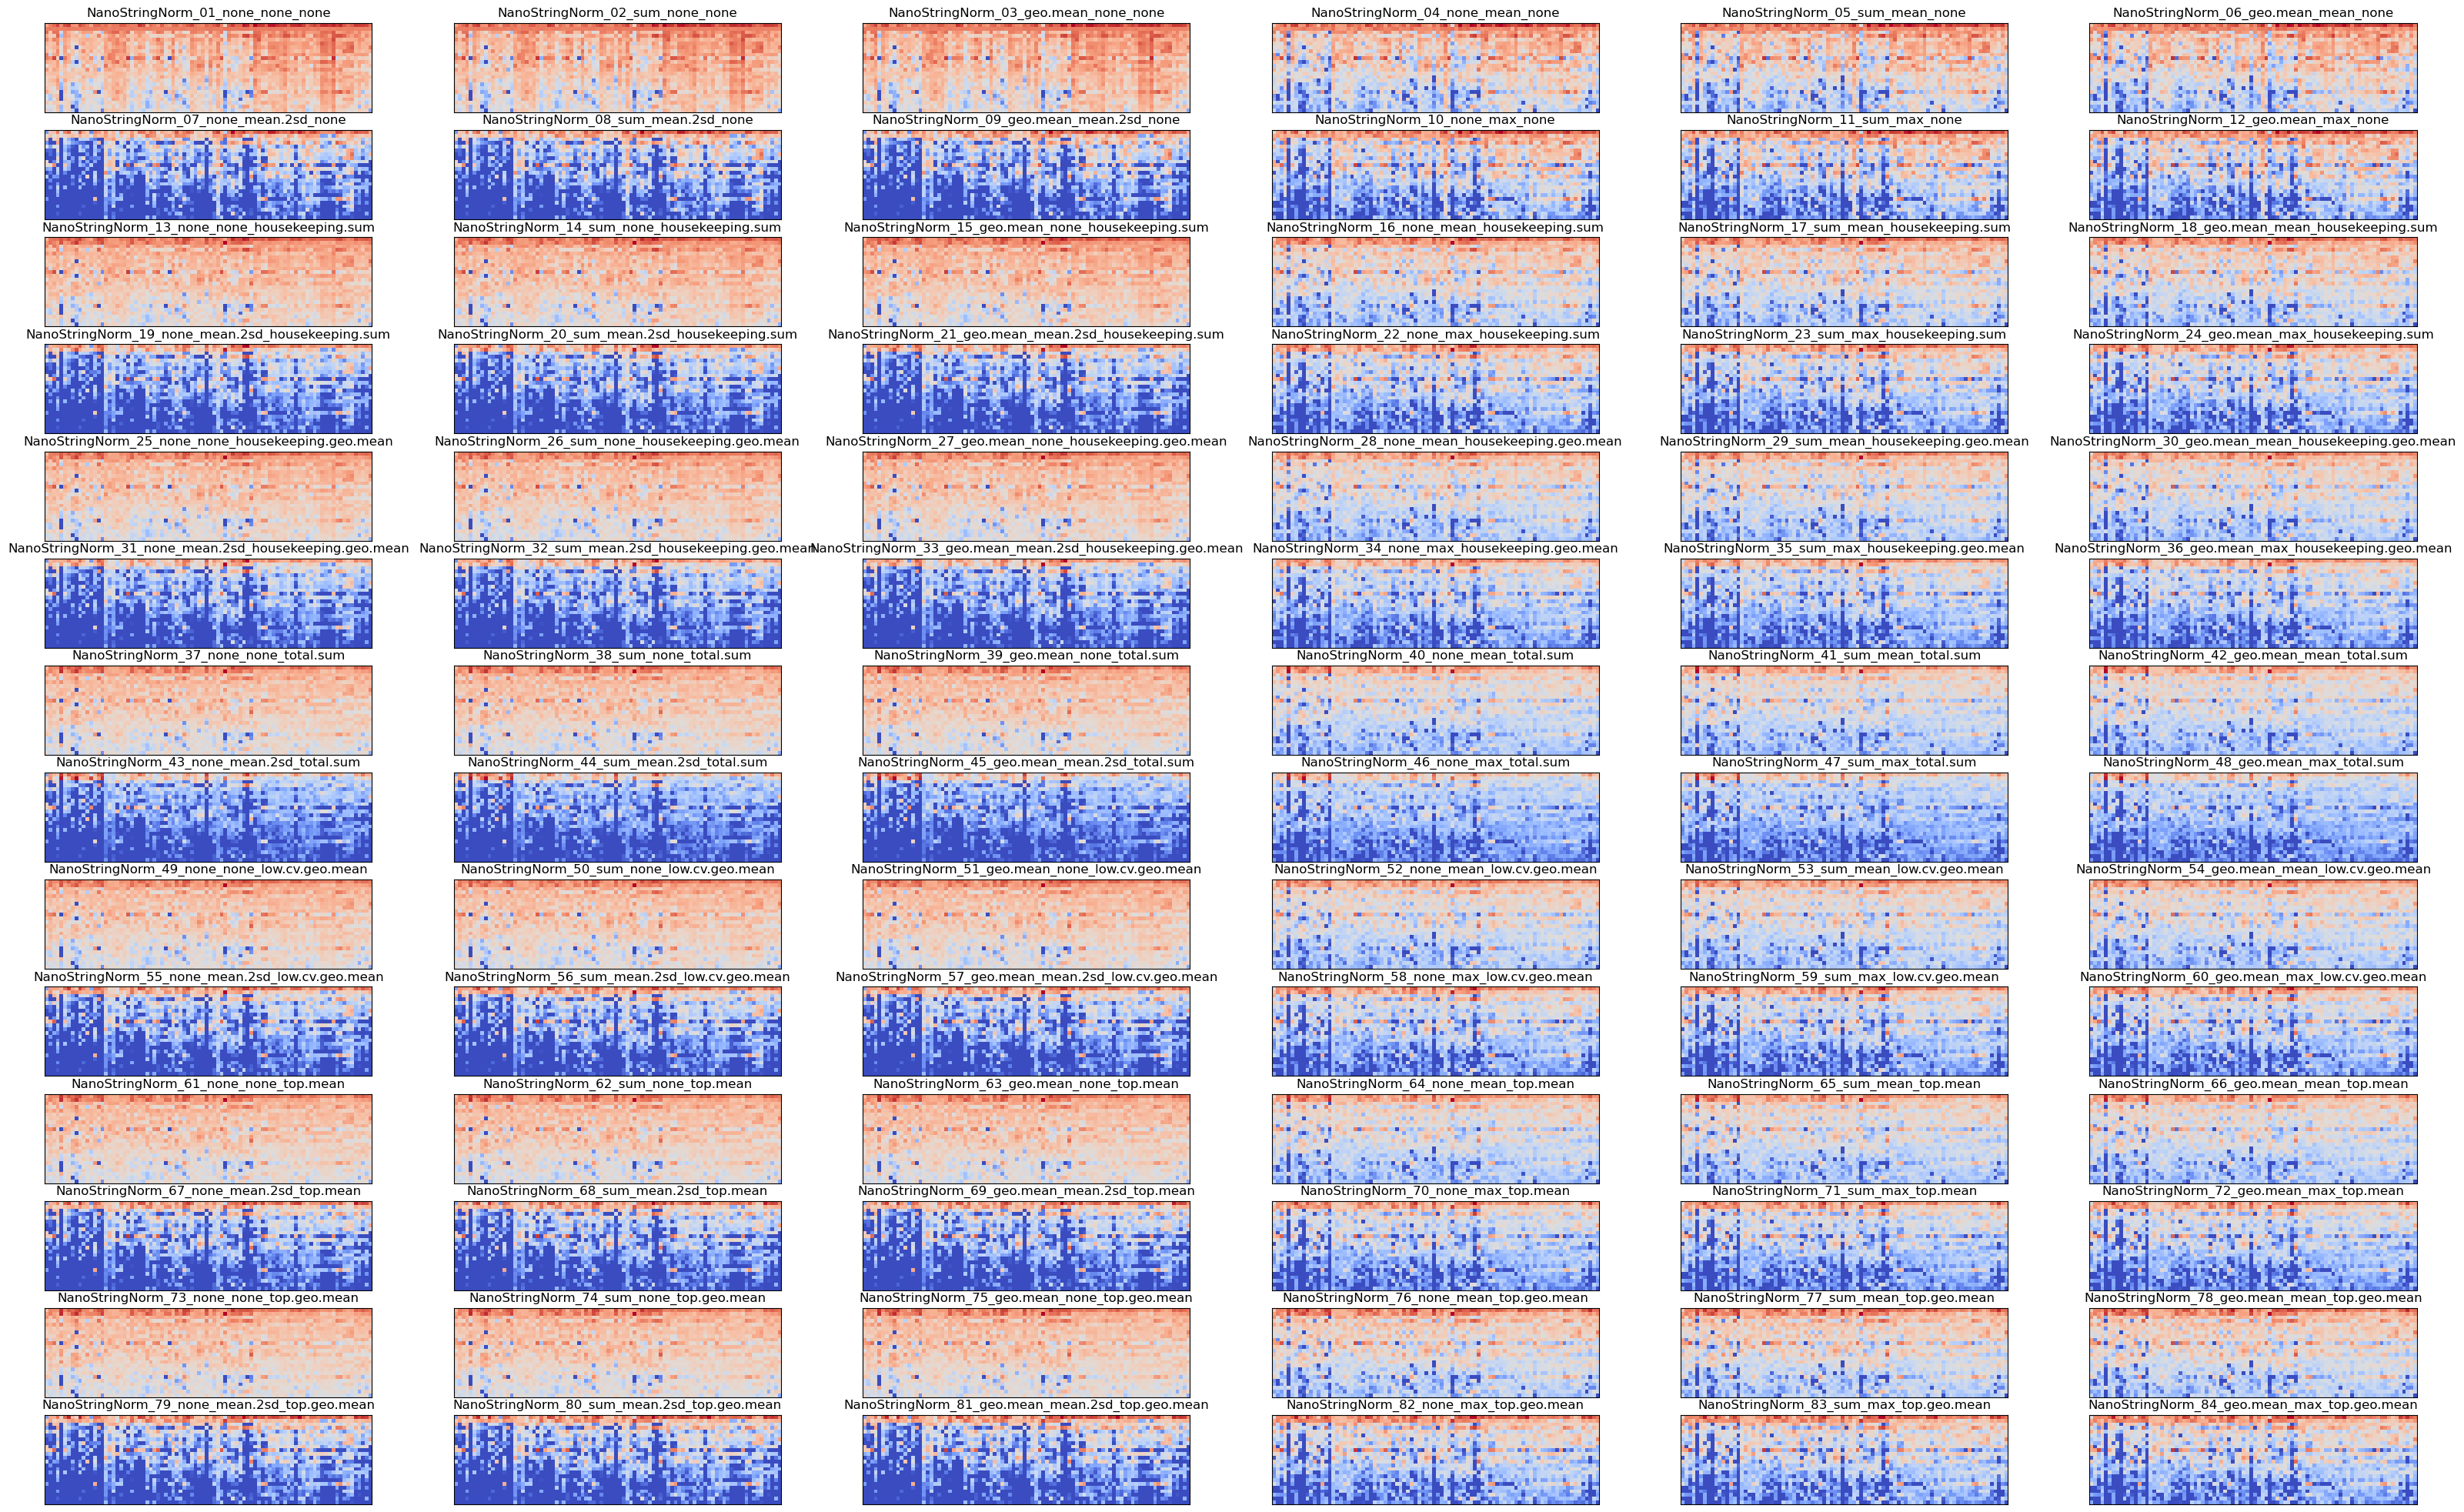

In [65]:
width = 6
height = 14

fig, axs = plt.subplots(height, width, figsize=[40,25])
# fig.suptitle('Nanostring Normalisation heatmaps')
for y in range(height):
    for x in range(width):
        fileIdx = x + y*width
        tempDF = pd.read_csv(os.path.join(normDir, 'NSNormDropped',files[fileIdx]), index_col=0)
#         axs[y][x].matshow(np.log2(tempDF + 1), aspect = 'auto', cmap='coolwarm')
        # axs[y][x].matshow(np.log2(tempDF.loc[probeOrder,sampleOrder] + 1), cmap='coolwarm')
        axs[y][x].matshow(np.log2(tempDF + 1), cmap='coolwarm')
        axs[y][x].set_xticks([])
        axs[y][x].set_yticks([])
        axs[y][x].set_title(files[fileIdx][:-4])
    
# plt.tight_layout()
# fig.show()
fig.savefig('NSNormDropped.png')

# working

In [43]:
# Drop samples from sample info file

In [44]:
# generate groups for EdgeR analysis

In [45]:
# temp = noneMeanHKDF > 0 

In [46]:
# noneMeanHKDF = pd.read_csv(os.path.join(normDir, 'NSNorm',files[27]), index_col=0)
noneMeanHKDF = pd.read_csv(os.path.join(normDir, 'NSNormDropped',files[27]), index_col=0)


In [47]:
# noneMeanHKDF

In [48]:
# groupedExpressedIndex = noneMeanHKDF.loc[probeOrder].loc[((noneMeanHKDF > 0 ).sum(axis = 1) / len(noneMeanHKDF.columns) > 0.33333)].index


In [49]:
# groupedExpressedIndex

In [50]:
# len(groupedExpressedIndex)

In [51]:
QCData = pd.read_csv(os.path.join(normDir, QCDataFile), index_col=0)

QCData

Code.Class  TMA_001_TNBC_240327a_001_Segment 1  \
Name                                                                      
HYB-POS                    Positive                           12.625935   
Ms IgG1                    Negative                            2.720807   
Ms IgG2a                   Negative                            2.627672   
Rb IgG                     Negative                            1.045593   
HYB-NEG                    Negative                            0.000000   
...                             ...                                 ...   
PD-L2                    Endogenous                            1.194733   
Phospho-GSK3B (S9)       Endogenous                            0.000000   
MART1                    Endogenous                            0.239181   
B7-H3                    Endogenous                            0.899915   
Phospho-Tuberin (T1462)  Endogenous                            0.000000   

                         TMA_001_TNBC_240327a_003_Segment 1  \
Name                                                          
HYB-POS                                           12.625935   
Ms IgG1                                            2.331394   
Ms IgG2a                                           2.132914   
Rb IgG                                             1.066650   
HYB-NEG                                            0.000000   
...                                                     ...   
PD-L2                                              1.215790   
Phospho-GSK3B (S9)                                 0.000000   
MART1                                              0.260238   
B7-H3                                              0.327210   
Phospho-Tuberin (T1462)                            0.278574   

                         TMA_001_TNBC_240327a_004_Segment 1  \
Name                                                          
HYB-POS                                           12.625935   
Ms IgG1                                            2.736299   
Ms IgG2a                                           3.146628   
Rb IgG                                             0.557196   
HYB-NEG                                            1.004169   
...                                                     ...   
PD-L2                                              1.334509   
Phospho-GSK3B (S9)                                 0.248340   
MART1                                              0.950250   
B7-H3                                              0.445930   
Phospho-Tuberin (T1462)                            0.397293   

                         TMA_001_TNBC_240327a_005_Segment 1  \
Name                                                          
HYB-POS                                           12.625935   
Ms IgG1                                            2.631488   
Ms IgG2a                                           2.510311   
Rb IgG                                             1.516725   
HYB-NEG                                            0.314395   
...                                                     ...   
PD-L2                                              0.824320   
Phospho-GSK3B (S9)                                 0.000000   
MART1                                              1.253591   
B7-H3                                              1.354296   
Phospho-Tuberin (T1462)                            1.281398   

                         TMA_001_TNBC_240327a_006_Segment 1  \
Name                                                          
HYB-POS                                           12.625935   
Ms IgG1                                            2.860733   
Ms IgG2a                                           2.342814   
Rb IgG                                             1.135462   
HYB-NEG                                            0.000000   
...                                                     ...   
PD-L2                                              0.000000   
Phospho-GSK3B (S9)    

# Run EdgeR analysis

Write comparisons to a text file that will be parsed by the r script

In form of factor.variable, factor.variable2, comparisonName
1 comparison per line

  make_option(c("-d", "--datadir"), type="character", default=NULL, 
              help="dataset file name", metavar="character"),
  make_option(c("-f", "--file"), type="character", default=NULL, 
              help="dataset file name", metavar="character"),
  make_option(c("-e", "--exportdir"), type="character", default="NSNorm", 
              help="dataset file name", metavar="character"),
  make_option(c("-i", "--sampleinfo"), type="character", default=NULL, 
              help="dataset file name", metavar="character")

### extract potential factors for analysis from info file

In [52]:
groups = ['Broad_classification']

In [53]:
# ['Sample_Type', 'Patient', 'Broad_classification']

### extract potential groups based on factors

### Show group numbers for each of the comparisons

In [54]:
# comps = [
#     [
#         'Hydrogel - Spheroid'
#     ],
#     [
#         'Hydrogel.BDNF - Hydrogel.SD',
#         'Hydrogel.Dream - Hydrogel.SD',
#         'Hydrogel.PDGF - Hydrogel.SD',
#         'Spheroid.Hep - Spheroid.SD'    
#     ],
#     [
#         'Hydrogel.SD.Outer - Hydrogel.SD.Inner',
#         'Hydrogel.BDNF.Outer - Hydrogel.BDNF.Inner',
#         'Hydrogel.Dream.Outer - Hydrogel.Dream.Inner',
#         'Hydrogel.PDGF.Outer - Hydrogel.PDGF.Inner',
#         'Spheroid.SD.Outer - Spheroid.SD.Inner',
#         'Spheroid.Hep.Outer - Spheroid.Hep.Inner'
#     ],
# ]

# compNames = []
# for g in comps:
#     ctemp = []
#     for c in g:
#         c = c.replace('.','_')
#         c = c.replace(' - ','_vs_')
#         ctemp.append(c)
#     compNames.append(ctemp)
    

# compNames

In [55]:
comps = [
    [
        'Secondary - Primary'
    ]
]

compNames = []
for g in comps:
    ctemp = []
    for c in g:
        c = c.replace('.','_')
        c = c.replace(' - ','_vs_')
        ctemp.append(c)
    compNames.append(ctemp)
    

compNames

[['Secondary_vs_Primary']]

In [56]:
# configDict['rootDir']

In [57]:
normPath = os.path.join('Normalisation','NSNormDropped')
print(normPath)

normFile = 'NanoStringNorm_49_none_none_low.cv.geo.mean.csv'
print(normFile)

exportdir = 'EdgeR'
runname = 'Default'
sampleinfoFile = 'sampleInfo_with_Wells.csv'

Normalisation/NSNormDropped
NanoStringNorm_49_none_none_low.cv.geo.mean.csv


### Set up config file for EdgeR

In [58]:
os.getcwd()

'/Users/upton6/Library/CloudStorage/OneDrive-QueenslandUniversityofTechnology/Documents/notebooks/Nanostring/Adams_Bray/DSP_EDA_Protein'

In [59]:
outFile = 'EdgeR_Config.txt'

outLines = []
for g in range(len(groups)):
    groupLine = 'GROUP:' + groups[g]
    outLines.append(groupLine)
    
    compLine = 'COMPARISON:'
    compNameLine = 'COMP_NAME:'
    for c in range(len(comps[g])):
        compLine += comps[g][c]
        compLine += ','
        compNameLine += compNames[g][c]
        compNameLine += ','
    
    outLines.append(compLine)
    outLines.append(compNameLine)

with open(outFile, 'w') as o:
    o.write('\n'.join(outLines))
    o.write('\n')

In [60]:
## Need to handle dropped samples that may still be present in sampleinfoFile. Could be handled with another file, or by removing samples within R.


In [66]:

cmd = 'Rscript EdgeR.R -c ' + os.getcwd() + ' -d ' + configDict['rootDir'] + ' -n ' + normPath + ' -f ' + normFile + ' -e ' + exportdir + ' -r ' + runname  + ' -i ' + sampleinfoFile
print(cmd)
os.system(cmd)

Rscript EdgeR.R -c /Users/upton6/Library/CloudStorage/OneDrive-QueenslandUniversityofTechnology/Documents/notebooks/Nanostring/Adams_Bray/DSP_EDA_Protein -d /Users/upton6/Documents/Nanostring/projects/Adams/ -n Normalisation/NSNormDropped -f NanoStringNorm_49_none_none_low.cv.geo.mean.csv -e EdgeR -r Default -i sampleInfo_with_Wells.csv
[1] "Checking libraries:"


Loading required package: edgeR
Loading required package: limma
Loading required package: optparse
Loading required package: stringr


[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[1] "If any values above are FALSE, library availability must be checked"
[1] " "
[1] "groups"
[[1]]
[1] "Broad_classification"

[1] "/Users/upton6/Documents/Nanostring/projects/Adams/"
[1] "/Users/upton6/Documents/Nanostring/projects/Adams//Normalisation/NSNormDropped/NanoStringNorm_49_none_none_low.cv.geo.mean.csv"
[1] "Normalisation/NSNormDropped"
[[1]]
[1] "Broad_classification"

Coefficient:  -1*Primary 1*Secondary 
                  logFC   logCPM         F      PValue        FDR
Fibronectin -0.40473806 16.07192 25.419352 0.004029152 0.09669964
S100B       -0.45004299 15.60390  7.972803 0.011257261 0.13508714
PanCk        0.25090251 15.86776 10.464755 0.092917116 0.74333693
CD45RO       0.19945061 15.86789  8.111040 0.182533739 0.99324417
BAD          0.18035367 15.54419  5.482746 0.307072042 0.99324417
CD44         0.12872137 15.86378  3.704558 0.392024636 0.99324417
SMA         -0.08143637 16.54138  1.817452 0.467526173 0.99324417

0

# Convert MD Plots to Volcano Plots

In [62]:
# Currently done in a separate notebook

In [63]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
# dataPath = '../../../Nanostring/projects/.../DSP_Protein_Data/'
dataPath = configDict['rootDir']
data = pd.read_csv(os.path.join(dataPath,'HK_Geo_Mean_Normalised.csv'), index_col = 0)
probeFilter = pd.read_csv(os.path.join(dataPath,'Probe_Filter.csv'), index_col = 0)
sampleInfo = pd.read_csv(os.path.join(dataPath,'Sample_Info.csv'), index_col = 0)

# dataPath = '../../../Nanostring/projects/.../EdgeR/EdgeR_normData.tsv'
dataPath = os.path.join(configDict['rootDir'], normPath, normFile)

data = pd.read_csv(dataPath, index_col = 0)

# dataPath = '../../../Nanostring/projects/.../DSP_Protein_Data/'
dataPath = configDict['rootDir']


In [ ]:
data

In [ ]:
sampleInfo.columns

In [ ]:
wb = load_workbook(os.path.join(dataPath,'Annotation template file-1a_wells_02.xlsx'))

print(wb.sheetnames)



In [ ]:
ws = wb['Annotation template']

segments = [[y.value for y in x] for x in ws[ws.calculate_dimension()]]
df = pd.DataFrame(segments)


rowLabels = df.iloc[1:,0]
colLabels = df.iloc[0,1:]
annotations = df.iloc[1:,1:]
rowLabels += '_'
rowLabels += df.iloc[1:,1]
rowLabels += '_Full ROI'



In [ ]:
rowLabels

In [ ]:
colLabels

In [ ]:
annotations.values

In [ ]:
sampleAnnotations = pd.DataFrame(annotations.values, index=rowLabels, columns=colLabels)

# sampleAnnotations = sampleAnnotations.T
# sampleAnnotations.set_index(0, drop=True, inplace=True)
# sampleAnnotations = sampleAnnotations.T
# sampleAnnotations.set_index('Scan name', drop=True, inplace=True)
# sampleAnnotations = sampleAnnotations.T



In [ ]:
sampleAnnotations

In [ ]:
sampleAnnotations = sampleAnnotations.join(sampleInfo.T,lsuffix='Drop').T

In [ ]:
sampleAnnotations.drop(labels=[x for x in sampleAnnotations.index if x.endswith('Drop')], inplace=True)

In [ ]:
sampleInfo = sampleAnnotations

In [ ]:
sampleInfo

In [ ]:
def standardize_data(arr):
         
    '''
    This function standardize an array, its substracts mean value, 
    and then divide the standard deviation.
    
    param 1: array 
    return: standardized array
    '''    
    rows, columns = arr.shape
    
    standardizedArray = np.zeros(shape=(rows, columns))
    tempArray = np.zeros(rows)
    
    for column in range(columns):
        
        mean = np.mean(X[:,column])
        std = np.std(X[:,column])
        tempArray = np.empty(0)
        
        for element in X[:,column]:
            
            tempArray = np.append(tempArray, ((element - mean) / std))
 
        standardizedArray[:,column] = tempArray
    
    return standardizedArray

In [ ]:
# Standardizing data

### I'm not sure that the transpose is what i want here. The data is the wrong shape and pc's seems to be being calculated for proteins instead of samples
X = endogNorm.transpose().values
# X = endogNorm.values
### Try to get pc's for samples
# X = endogNorm.values

## ??? With transpose makes PCA for effect of variables on smaples, without makes PCA for effects of variables on protein expression levels
###^^^ Maybe the other way round?



X_cols = endogNorm.columns
print(X_cols.shape)
y = endogNorm.index
print(y.shape)
X = standardize_data(X)
print(X.shape)


In [ ]:
# Calculating the covariance matrix

covariance_matrix = np.cov(X.T)
# covariance_matrix = np.cov(X)



print(covariance_matrix.shape)


In [ ]:
# Using np.linalg.eig function

eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")
print(eigen_vectors.shape)

In [ ]:
eigenDF = pd.DataFrame(eigen_vectors, index=[endogNorm.index], columns=[endogNorm.index])
# eigenDF = pd.DataFrame(eigen_vectors, index=[endogNorm.columns], columns=[endogNorm.columns])

In [ ]:
# Calculating the explained variance on each of components


variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
print(variance_explained)

In [ ]:
# Identifying components that explain at least 95%

cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)


In [ ]:
cumulative_variance_explained = [np.float64(x) for x in cumulative_variance_explained]

In [ ]:
cumulative_variance_explained[0].dtype

In [ ]:
# Visualizing the eigenvalues and finding the "elbow" in the graphic


sns.lineplot(x = [i for i in range(len(cumulative_variance_explained))], y=cumulative_variance_explained)
# plt.xlabel("Number of components")
# plt.ylabel("Cumulative explained variance")
# plt.title("Explained variance vs Number of components")



# ToDo:
# Add lines for 95% variance, and number of components describing at least 95% of variance



In [ ]:
# Using two first components (because those explain more than 95%)

projection_matrix = (eigen_vectors.T[:][:50]).T
print(projection_matrix)

In [ ]:
colours = ['g' if x.split('_')[-1] == 'Tumour' else 'r' for x in X_cols]
colours = ['g' if x.split('_')[-1] == 'Tumour' else 'r' if x.split('_')[-1] == 'Immune' else 'purple' for x in X_cols]


In [ ]:
# I dont think this gives relevant info. projection matrix needs to be combined with original data to see effects of components on patients

plt.scatter([x[0] for x in projection_matrix], [x[1] for x in projection_matrix])#, c=colours)

projection_matrix.shape

In [ ]:
plt.scatter([x[2] for x in projection_matrix], [x[1] for x in projection_matrix])#, c=colours)


In [ ]:
plt.scatter([x[2] for x in projection_matrix], [x[3] for x in projection_matrix])#, c=colours)


In [ ]:
# Getting the product of original standardized X and the eigenvectors 


X_pca = X.dot(projection_matrix)
print(X_pca)

In [ ]:
X_pca.shape

In [ ]:
sampleInfo

In [ ]:
# tagDF = pd.DataFrame( data=[x.split(',') for x in sampleInfo.loc['Segment tags']], index=sampleInfo.columns, columns=['Obese','Arth','Patellar'])

In [ ]:
# tagDF

In [ ]:
# sampleInfo = pd.concat([sampleInfo,tagDF.T])

In [ ]:
sampleInfo

In [ ]:
inforSortedIndex = sampleInfo.sort_values(by=['Obese','arthritis','TMA_Core'], axis=1).columns

In [ ]:
### Add umap / tSNE analysis here